In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [86]:
datos = pd.read_csv(filepath_or_buffer = "C:/Users/espin/Downloads/articulos_ml.csv", sep=',', low_memory=False)

In [87]:
datos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [88]:
datos.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


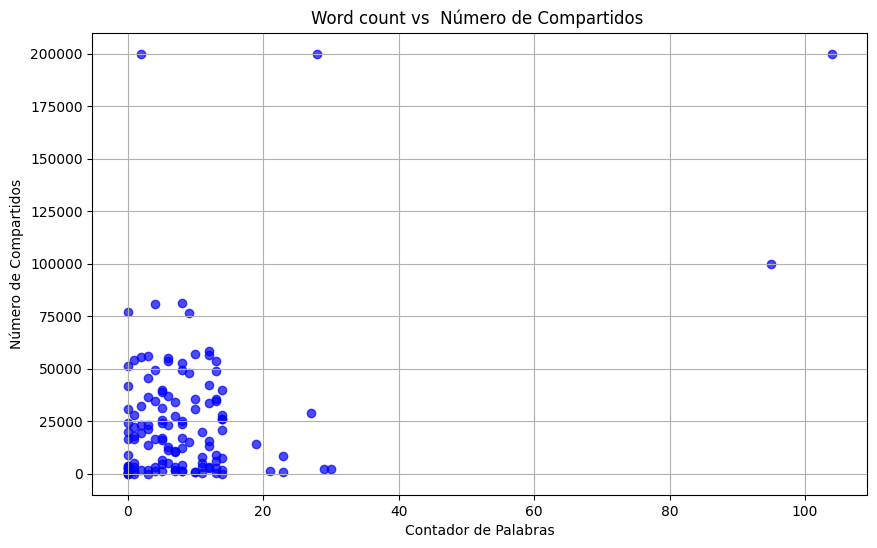

In [89]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['# of comments'], datos['# Shares'], color='blue', alpha=0.7)
plt.title('Word count vs  Número de Compartidos ')
plt.xlabel('Contador de Palabras')
plt.ylabel('Número de Compartidos')
plt.grid(True)
plt.show()

In [90]:
# Limpiar datos
datos = datos.dropna(subset=['# Shares']) 
datos = datos.fillna(0)  

In [91]:
# Seleccionar características y variable objetivo
X = datos[['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days']]
y = datos['# Shares']

In [92]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
regressor = LinearRegression()  #Se estancia el modelo de regresión lineal en un objeto llamado regressor
regressor.fit(X_train, y_train) #Entrena el algoritmo con la funcion .fit

LinearRegression()

In [94]:
#Para obtener el intercepto:, se multiplica por los valores del vector x mas el valor de alpha
print(regressor.intercept_)
#Para obtener la pendiente
print(regressor.coef_)

-1419.6367621108657
[  4.46633726 189.40511858 762.96585174 350.42698886 142.01071666]


In [95]:
y_pred = regressor.predict(X_test) #Calculo de valores predichos

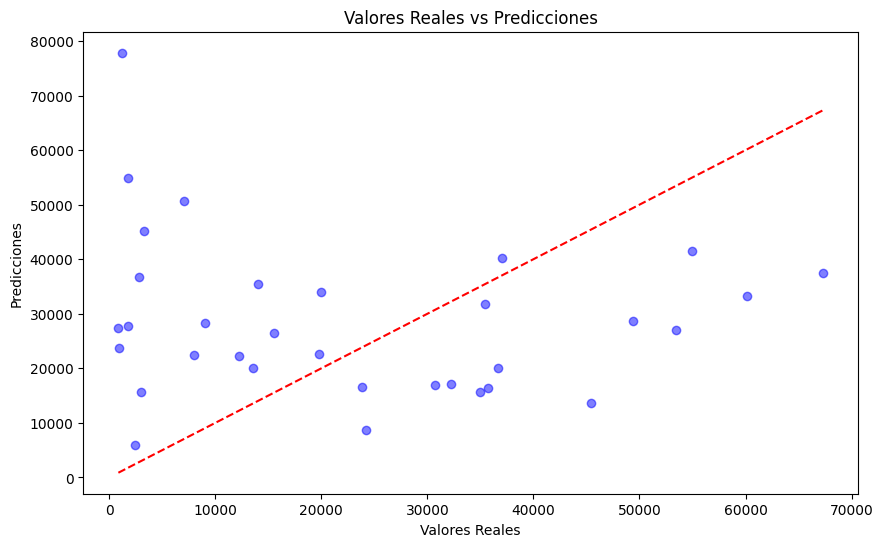

In [96]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.show()

In [97]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 

Error Absoluto Medio: 21292.993004628257


In [98]:
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred))

Error Cuadratico Medio: 689436437.060942


In [99]:
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Raíz del error cuadrático medio: 26257.121644630854


In [100]:
#Coeficiente de determinación r2
r2= regressor.score(X_test, y_test)

In [101]:
#Error cuadratico relativo, es una metrica para la presición de su modelo
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = -0.8222444400335356


In [102]:
#definir la evaluación
cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)

In [103]:
#definiendo el espacio de busqueda
space = dict()
space['copy_X'] = [True, False]
space['positive'] = [True, False]
space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]

In [104]:
search = RandomizedSearchCV(regressor, space, n_iter=8, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [105]:
#Ejecutando la busqueda
# "X" son los predictores y "y" es el valor predicho
result = search.fit(X,y)

In [106]:
#Resumen de resultados
print('Mejor puntuación: %s' % result.best_score_)
print('Mejores Hiperparametros: %s' % result.best_params_)

Mejor puntuación: -26821.44263728234
Mejores Hiperparametros: {'positive': True, 'fit_intercept': False, 'copy_X': True}


In [107]:
#Función que optimiza el modelo con los mejores hiperparametros
regressor = LinearRegression(fit_intercept = False, positive = True, copy_X = True)

In [108]:
#Re-entrenando el modelo 
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False, positive=True)

In [109]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 

Error Absoluto Medio: 21292.993004628257


In [110]:
#Coeficiente de determinación r2
r2= regressor.score(X_test, y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = -0.7952887463210856


In [111]:
print("Coeficiente dedeterminación R^ 2: ", regressor.score(X,y))

Coeficiente dedeterminación R^ 2:  0.23176320544421714
